# Analize

## Step 1: Import Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 : Load Dataset

In [5]:
ratings_path = "/home/mohammad/Documents/PROJECTS/Movielo/data/ml-latest-small/ratings.csv"
ratings = pd.read_csv(ratings_path)

In [127]:
movies_path = "/home/mohammad/Documents/PROJECTS/Movielo/data/ml-latest-small/movies.csv"
movies = pd.read_csv(movies_path)

## Step 3 : Exploratory Data Analysis

In [155]:
n_ratings = len(ratings)
n_movies = ratings["movieId"].nunique()
n_users = ratings["userId"].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's :{n_movies}")
print(f"Number of unique movieId's :{n_users}")
print(f"Average number of ratings per user : {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie : {round(n_ratings/n_movies, 2)}")

Number of ratings: 100836
Number of unique movieId's :9724
Number of unique movieId's :610
Average number of ratings per user : 165.3
Average number of ratings per movie : 10.37


What is the distribution of movie ratings?

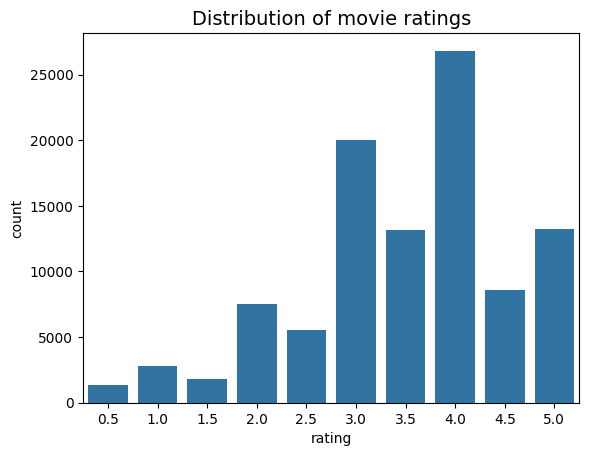

In [151]:
sns.countplot(x="rating", data=ratings)
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [152]:
mean_global_ratings = ratings["rating"].mean()
print(f"Mean global rating: {round(mean_global_ratings, 2)}")

Mean global rating: 3.5


In [153]:
mean_rating_user = ratings.groupby("userId")["rating"].mean()
print(f"Mean rating per user : {round(mean_rating_user.mean(), 2)}")

Mean rating per user : 3.66


which movies are most frequently rated?

In [38]:
movie_ratings = ratings.merge(movies, on="movieId").sort_values(by="movieId")
movie_ratings["title"].value_counts()[:10]


title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64

What are the lowest and highest rated movies?

In [47]:
mean_ratings = ratings.groupby("movieId")[["rating"]].mean()
lowest_rated = mean_ratings["rating"].idxmin()
movies[movies["movieId"] == lowest_rated]

,movieId,title,genres
2689,3604,Gypsy (1962),Musical


In [49]:
highest_rated = mean_ratings["rating"].idxmax()
movies[movies["movieId"] == highest_rated]

,movieId,title,genres
48,53,Lamerica (1994),Adventure|Drama


In [52]:
ratings[ratings["movieId"] == highest_rated]

,userId,movieId,rating,timestamp
13368,85,53,5.0,889468268
96115,603,53,5.0,963180003


# Description of Bayesian Average
The Bayesian average is a statistical method used to estimate the mean of a set of data that incorporates prior knowledge or beliefs about the data. This approach is particularly useful in situations where data sets are small or where certain values are overrepresented, helping to mitigate the effect of outliers and providing a more balanced estimation.

1. ## Prior Information:

- Bayesian average incorporates prior beliefs or knowledge about the data, which is usually represented as a prior distribution.
- The prior distribution reflects what is known about the parameter before observing the data.

2. Likelihood:

- The likelihood is the probability of the observed data given a particular value of the parameter.
- It represents the information gained from the actual observed data.

3. Posterior Distribution:

- he combination of prior distribution and likelihood yields the posterior distribution.
- The posterior distribution represents the updated beliefs about the parameter after considering the observed data.

4. Formula:

 ![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/06/bayesianParameter.jpg.jpg)

In [55]:
movies_state = ratings.groupby("movieId")["rating"].agg(["count", "mean"])


In [96]:
c = movies_state["count"].mean()
m = movies_state["mean"].mean()

print(f"Average number of ratings for a given movies: {c:.2f}")
print(f"Average ratings for a given movie: {m:.2f}")

def bayesian_avg(ratings):
    bayesian_avg = (c*m+ratings.sum())/(c+ratings.count())
    return round(bayesian_avg, 3)

Average number of ratings for a given movies: 10.37
Average ratings for a given movie: 3.26


In [106]:
bayesian_avg_ratings = ratings.groupby("movieId")["rating"].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ["movieId", "bayesians_avg"]
movie_stats = movies_state.merge(bayesian_avg_ratings, on="movieId")


In [115]:
movie_stats = movie_stats.merge(movies[["movieId", "title"]])
movie_stats.sort_values(by="bayesians_avg", ascending=False)

,movieId,count,mean,bayesians_avg,title
277,318,317,4.429022,4.392,"Shawshank Redemption, The (1994)"
659,858,192,4.289062,4.236,"Godfather, The (1972)"
2224,2959,218,4.272936,4.227,Fight Club (1999)
224,260,251,4.231076,4.193,Star Wars: Episode IV - A New Hope (1977)
46,50,204,4.237745,4.191,"Usual Suspects, The (1995)"
...,...,...,...,...,...
1988,2643,16,1.687500,2.307,Superman IV: The Quest for Peace (1987)
1144,1499,27,1.925926,2.297,Anaconda (1997)
1372,1882,33,1.954545,2.267,Godzilla (1998)
2679,3593,19,1.657895,2.224,Battlefield Earth (2000)


In [125]:
movie_stats.sort_values(by="bayesians_avg", ascending=True)

,movieId,count,mean,bayesians_avg,title
1172,1556,19,1.605263,2.190,Speed 2: Cruise Control (1997)
2679,3593,19,1.657895,2.224,Battlefield Earth (2000)
1372,1882,33,1.954545,2.267,Godzilla (1998)
1144,1499,27,1.925926,2.297,Anaconda (1997)
1988,2643,16,1.687500,2.307,Superman IV: The Quest for Peace (1987)
...,...,...,...,...,...
46,50,204,4.237745,4.191,"Usual Suspects, The (1995)"
224,260,251,4.231076,4.193,Star Wars: Episode IV - A New Hope (1977)
2224,2959,218,4.272936,4.227,Fight Club (1999)
659,858,192,4.289062,4.236,"Godfather, The (1972)"


In [128]:
movies["genres"] = movies["genres"].apply(lambda x:x.split("|"))


### How meny mvoie geners are there?

In [131]:
from collections import Counter
genre_frequancy = Counter(g for genres in movies["genres"] for g in genres)
print(f"There are {len(genre_frequancy)} genres.")
genre_frequancy

There are 20 genres.


Counter({'Drama': 4361,
         'Comedy': 3756,
         'Thriller': 1894,
         'Action': 1828,
         'Romance': 1596,
         'Adventure': 1263,
         'Crime': 1199,
         'Sci-Fi': 980,
         'Horror': 978,
         'Fantasy': 779,
         'Children': 664,
         'Animation': 611,
         'Mystery': 573,
         'Documentary': 440,
         'War': 382,
         'Musical': 334,
         'Western': 167,
         'IMAX': 158,
         'Film-Noir': 87,
         '(no genres listed)': 34})

In [133]:
print(f"The 5 most commen genres:\n", genre_frequancy.most_common(5))

The 5 most commen genres:
 [('Drama', 4361), ('Comedy', 3756), ('Thriller', 1894), ('Action', 1828), ('Romance', 1596)]


/tmp/ipykernel_24202/2768090804.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="genres", y="count", data=genre_frequancy_df, palette="viridis")


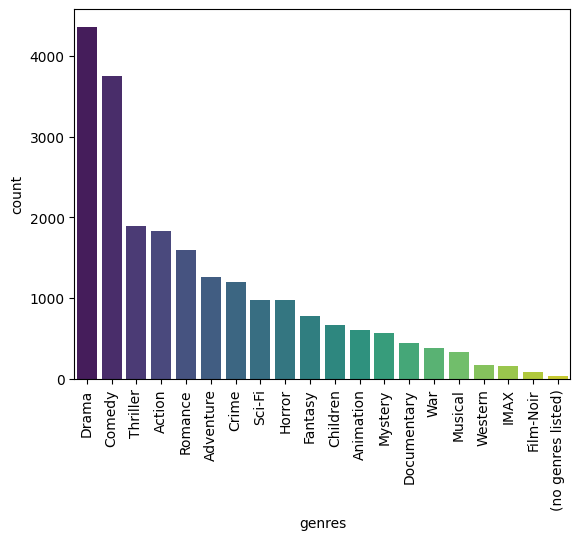

In [149]:
genre_frequancy_df = pd.DataFrame([genre_frequancy]).T.reset_index()
genre_frequancy_df.columns = ["genres", "count"]
genre_frequancy_df.sort_values(by="count", ascending=False, inplace=True)

sns.barplot(x="genres", y="count", data=genre_frequancy_df, palette="viridis")
plt.xticks(rotation=90)
plt.show()